In [1]:
from src.ACO.aco_structures import Edge, Ant, Problem
from src.ACO.solve import SolveTSPUsingACO
from src.ACO.load_data_aco import load_data

In [2]:
import numpy as np

In [3]:
data = load_data('dataset/hustack/input/200.txt')

In [4]:
problem = Problem(num_request=data[0],
                  request=data[1], 
                  time_matrix=np.array(data[2]))

Starting ACO algorithm (ACS)...


Running ACO (ACS): 100%|██████████| 100/100 [03:03<00:00,  1.83s/it]


Completed ACS
Runtime: 183.4901s
Best Fitness (Cost): 1567598250.00
Travel=97660, Late=1567363.0, Wait=13759.0
Best tour: [54, 92, 148, 4, 64, 149, 133, 126, 89, 86, 142, 76, 105, 41, 162, 178, 39, 198, 98, 169, 195, 110, 100, 165, 193, 163, 189, 137, 67, 40, 157, 11, 158, 1, 108, 43, 136, 93, 143, 48, 44, 182, 150, 197, 53, 97, 71, 102, 88, 138, 109, 16, 46, 183, 63, 69, 5, 130, 60, 68, 166, 2, 171, 200, 127, 77, 177, 140, 81, 160, 134, 84, 164, 87, 57, 199, 90, 91, 117, 28, 94, 95, 112, 78, 188, 192, 21, 155, 120, 75, 14, 35, 196, 10, 52, 111, 118, 151, 186, 167, 32, 51, 119, 170, 181, 122, 66, 125, 132, 13, 9, 173, 8, 7, 185, 146, 70, 33, 103, 139, 82, 129, 22, 176, 135, 36, 45, 123, 25, 24, 154, 121, 15, 99, 153, 37, 144, 161, 96, 80, 59, 114, 56, 17, 106, 55, 65, 115, 152, 175, 20, 124, 168, 26, 31, 62, 50, 74, 184, 27, 113, 30, 79, 187, 190, 191, 128, 58, 85, 104, 180, 145, 72, 23, 18, 34, 172, 3, 101, 116, 12, 159, 61, 147, 194, 19, 131, 6, 47, 174, 179, 83, 156, 107, 42, 29, 49

Running ACO (Elitist): 100%|██████████| 100/100 [03:02<00:00,  1.83s/it]


Completed Elitist
Runtime: 182.6163s
Best Fitness (Cost): 1472088880.00
Travel=98940, Late=1471819.0, Wait=17094.0
Best tour: [54, 148, 4, 64, 149, 133, 126, 89, 86, 49, 142, 105, 41, 162, 178, 39, 198, 98, 195, 110, 100, 193, 172, 163, 29, 6, 19, 189, 137, 34, 179, 67, 40, 157, 158, 1, 108, 43, 174, 136, 143, 48, 150, 197, 53, 97, 71, 102, 88, 138, 109, 16, 46, 183, 63, 69, 5, 130, 60, 3, 68, 166, 2, 171, 73, 116, 200, 127, 77, 177, 38, 140, 81, 160, 134, 84, 156, 164, 87, 57, 199, 90, 91, 117, 28, 94, 95, 112, 78, 188, 192, 21, 75, 14, 35, 83, 107, 196, 10, 52, 111, 118, 151, 186, 167, 32, 51, 119, 170, 181, 122, 66, 125, 173, 8, 131, 61, 7, 185, 146, 70, 103, 139, 82, 141, 129, 47, 22, 176, 147, 36, 101, 45, 123, 25, 24, 154, 99, 153, 37, 144, 161, 96, 80, 59, 56, 159, 17, 55, 65, 115, 152, 175, 20, 168, 26, 31, 62, 50, 184, 27, 113, 79, 180, 145, 72, 23, 18, 92, 194, 104, 132, 42, 187, 135, 128, 93, 58, 12, 121, 106, 44, 169, 33, 191, 13, 190, 120, 114, 165, 182, 76, 124, 9, 155, 8

Running ACO (MaxMin): 100%|██████████| 100/100 [03:00<00:00,  1.81s/it]


Completed MaxMin
Runtime: 180.6426s
Best Fitness (Cost): 104250.00
Travel=98410, Late=0.0, Wait=584.0
Best tour: [54, 92, 148, 4, 64, 149, 133, 126, 89, 86, 49, 142, 76, 105, 41, 162, 178, 39, 198, 98, 169, 195, 110, 100, 165, 193, 172, 163, 29, 6, 19, 189, 137, 34, 179, 67, 40, 157, 11, 158, 1, 108, 43, 174, 136, 93, 143, 48, 44, 182, 150, 197, 53, 97, 71, 102, 88, 138, 109, 16, 46, 183, 63, 69, 5, 130, 60, 3, 68, 166, 2, 171, 73, 116, 200, 127, 77, 177, 38, 140, 81, 160, 134, 84, 156, 164, 87, 57, 199, 90, 91, 117, 28, 94, 95, 112, 78, 188, 192, 21, 155, 120, 75, 14, 35, 83, 107, 196, 10, 52, 111, 118, 42, 151, 186, 167, 32, 51, 119, 170, 181, 122, 66, 194, 125, 132, 13, 9, 173, 8, 131, 61, 7, 185, 146, 70, 33, 103, 139, 82, 141, 129, 47, 22, 176, 135, 147, 36, 101, 45, 123, 25, 24, 154, 121, 15, 99, 153, 37, 144, 161, 96, 80, 59, 114, 56, 159, 17, 12, 106, 55, 65, 115, 152, 175, 20, 124, 168, 26, 31, 62, 50, 74, 184, 27, 113, 30, 79, 187, 190, 191, 128, 58, 85, 104, 180, 145, 72, 23

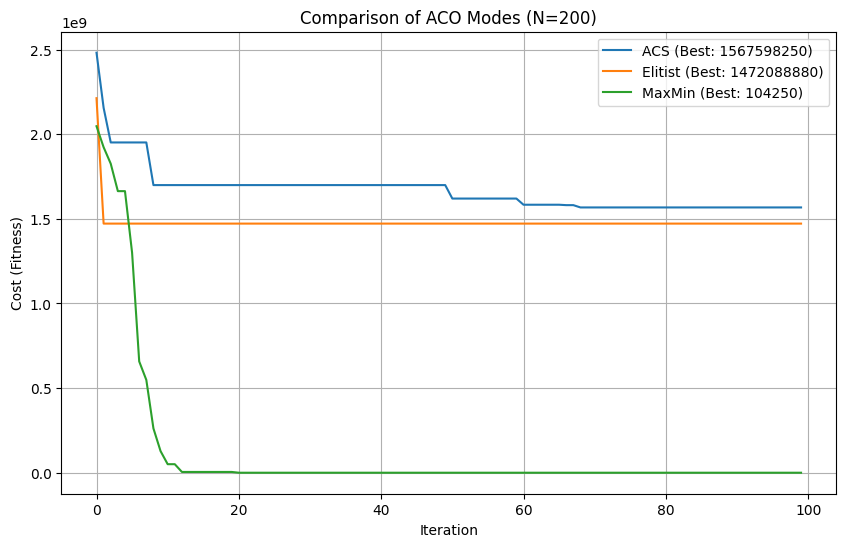

In [5]:
import matplotlib.pyplot as plt
from src.ACO.solve import SolveTSPUsingACO

common_params = {
    "problem": problem,         
    "colony_size": 20,
    "steps": 100,                # Số thế hệ (iterations)
    "alpha": 1.0,
    "beta": 3.0,
    "rho": 0.1,
    "pheromone_deposit_weight": 1.0,
    "initial_pheromone": 1.0,
    "elitist_weight": 1.0,       # Chỉ dùng cho Elitist
    "min_scaling_factor": 0.001  # Chỉ dùng cho MaxMin
}


modes = ['ACS', 'Elitist', 'MaxMin']
results = {} 


plt.figure(figsize=(10, 6))

for mode in modes:
    solver = SolveTSPUsingACO(mode=mode, **common_params)
    runtime, best_cost, progress = solver.run()
    results[mode] = progress
    plt.plot(progress, label=f'{mode} (Best: {best_cost:.0f})')


plt.title(f"Comparison of ACO Modes (N={problem.num_request})")
plt.xlabel("Iteration")
plt.ylabel("Cost (Fitness)")
plt.legend() 
plt.grid(True)


plt.savefig('aco_comparison.png')
plt.show()